## **LOAD THE DATASET AND LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.metrics import recall_score
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Parkinsson disease.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data=data.drop(['name'],axis=1)

# **EXPLORATORY DATA ANALYSIS**

In [5]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [ ]:
data.shape

(195, 23)

## **VISUALIZATIONS**

<Axes: xlabel='status', ylabel='count'>

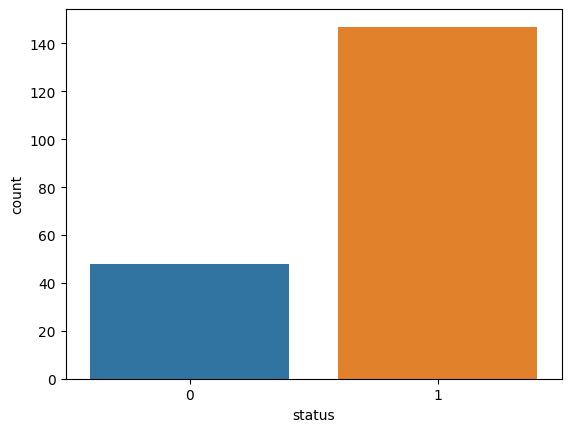

In [ ]:
import seaborn as sns
sns.countplot(x="status", data=data)

<Axes: ylabel='status'>

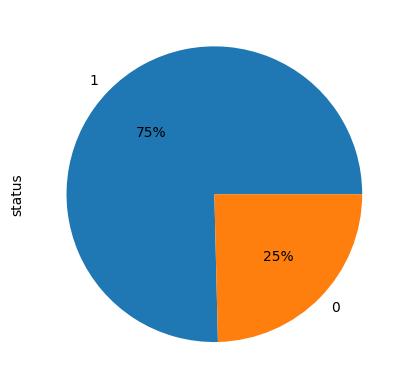

In [ ]:
data['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

In [ ]:
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
print(str((147/(147+48))*100) + '% of the data have Parkinsons Disease with a ratio of 49:16')


75.38461538461539% of the data have Parkinsons Disease with a ratio of 49:16


<Axes: >

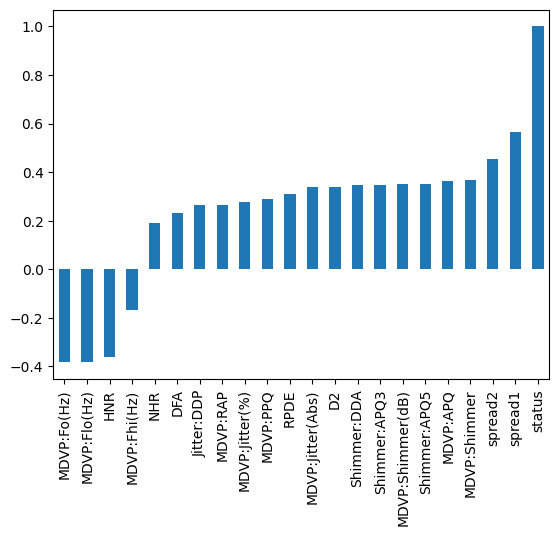

In [ ]:
data.corr()['status'][:-1].sort_values().plot(kind='bar')

<Axes: >

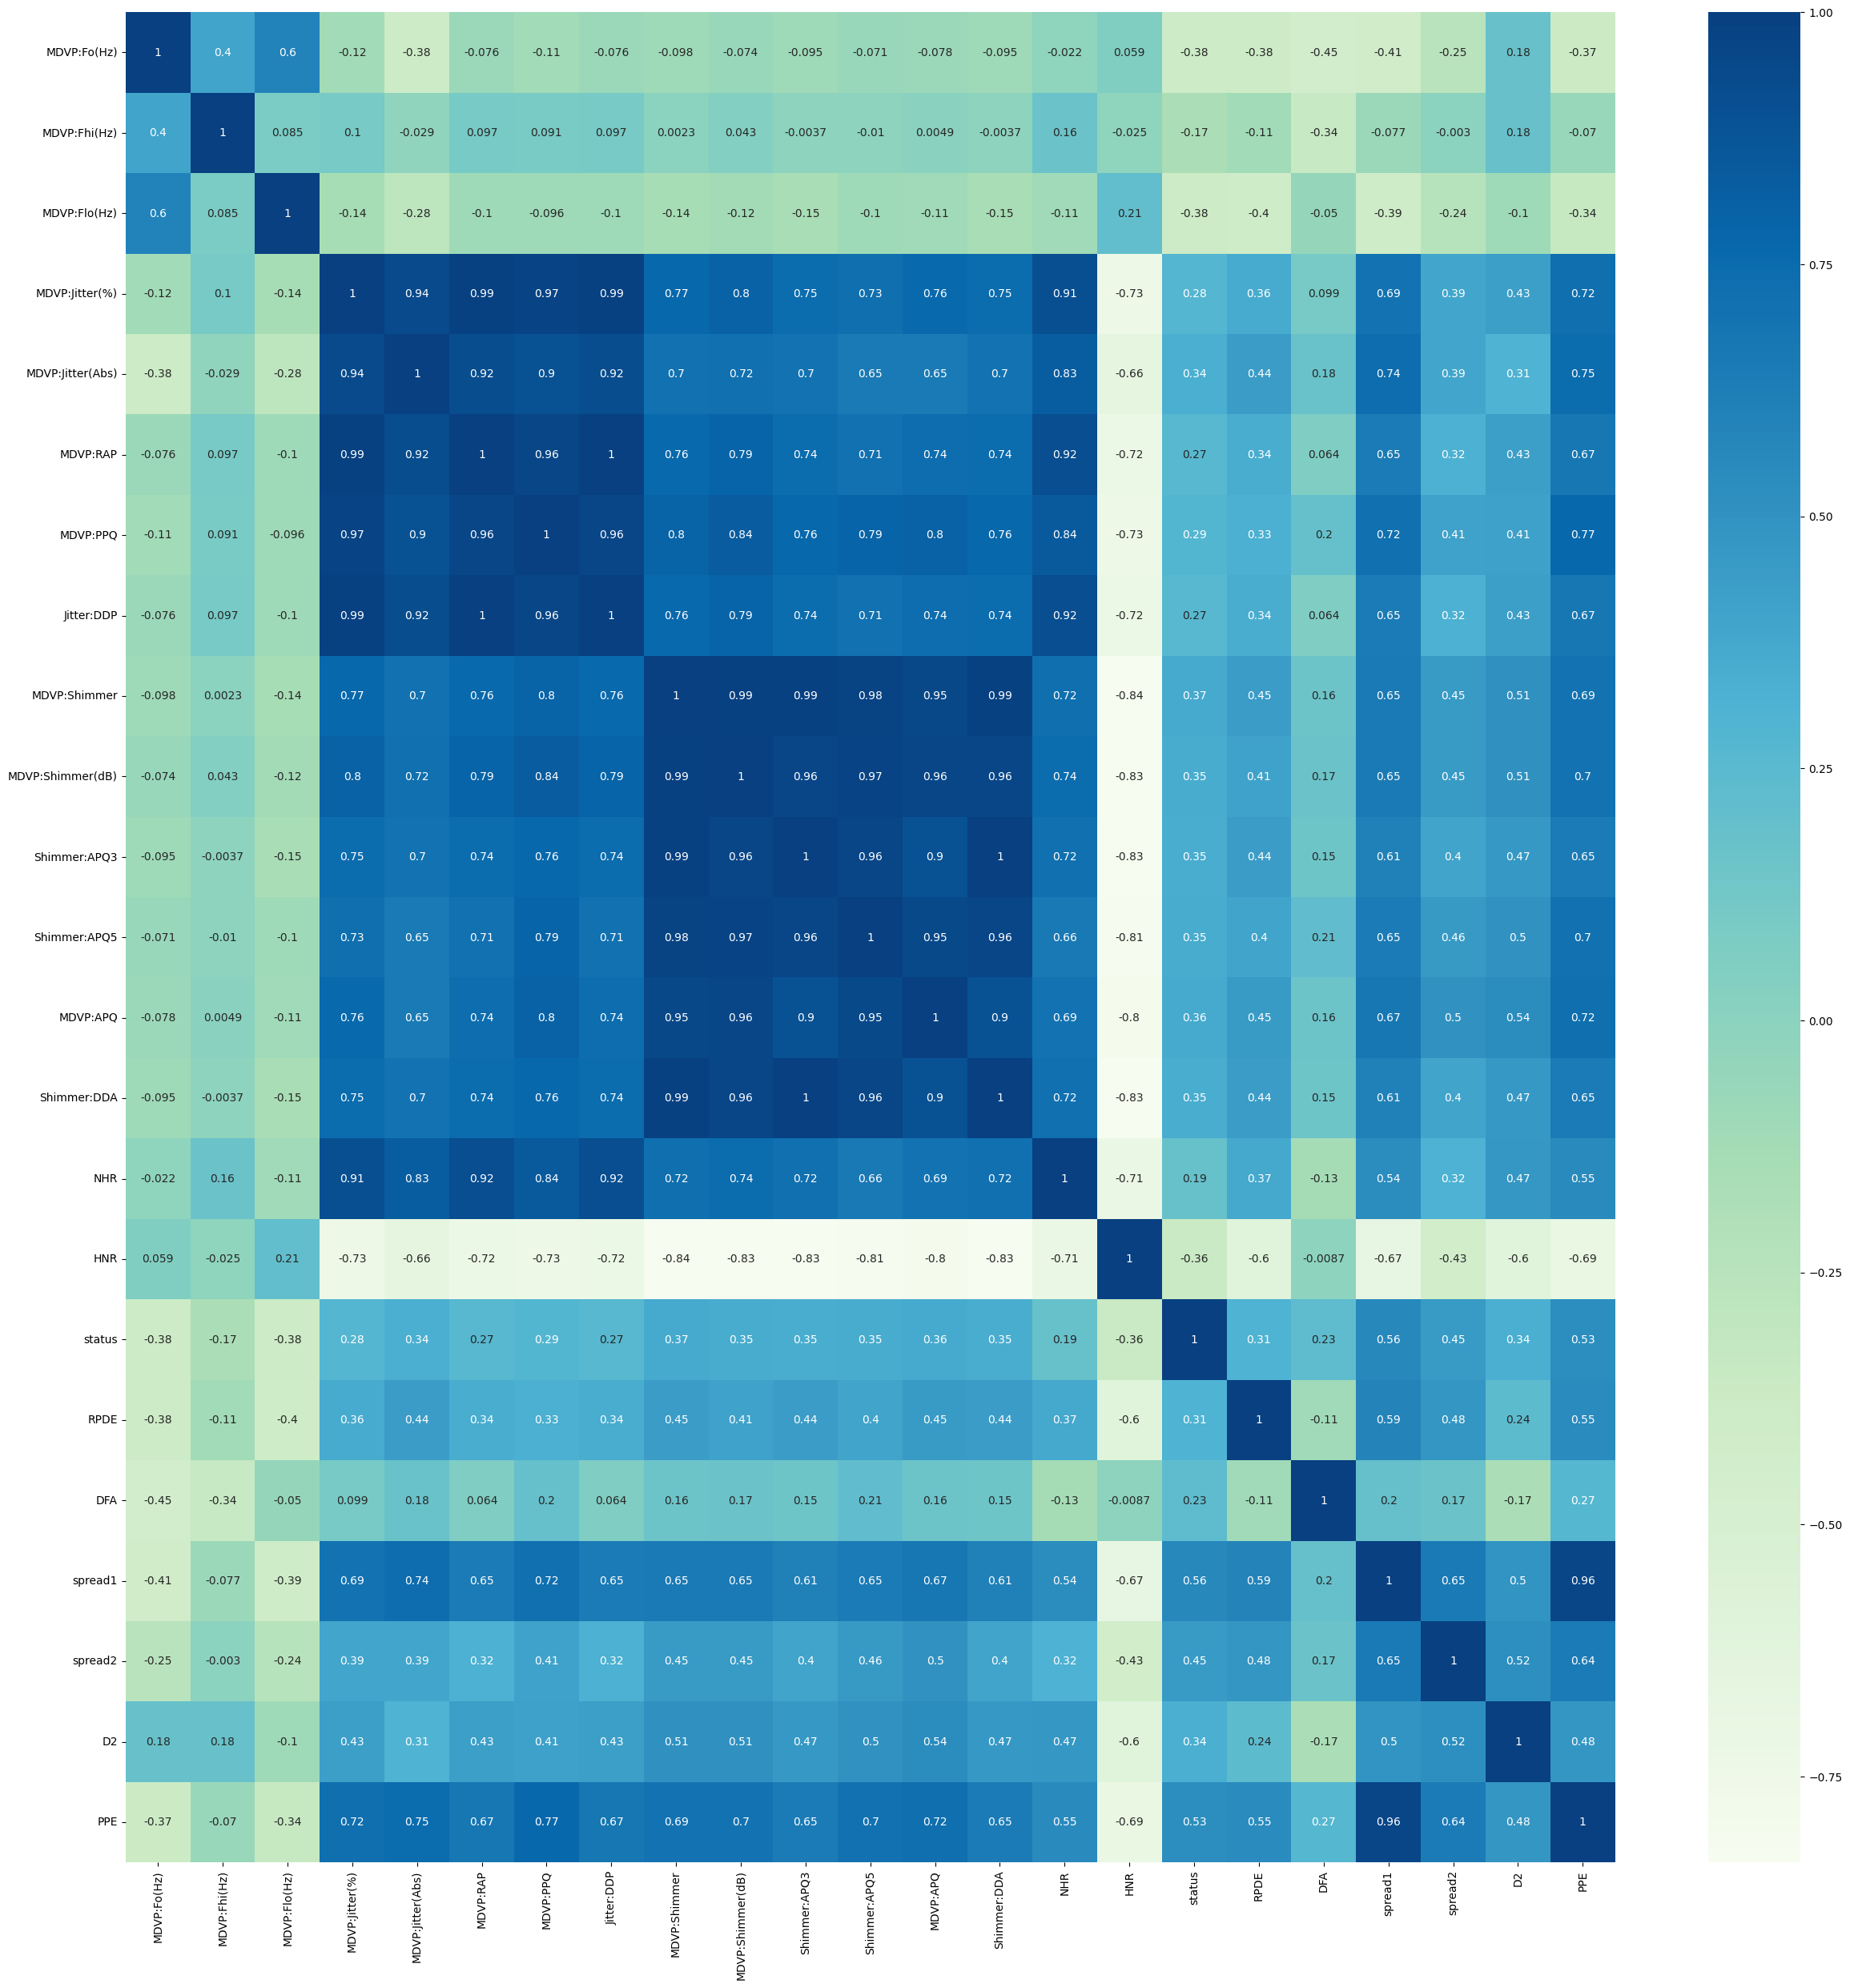

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot = True, cmap= "GnBu")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# draw data
def plot_data(data, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = data.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(data[column_name], kde = True, color = 'red')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=data[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

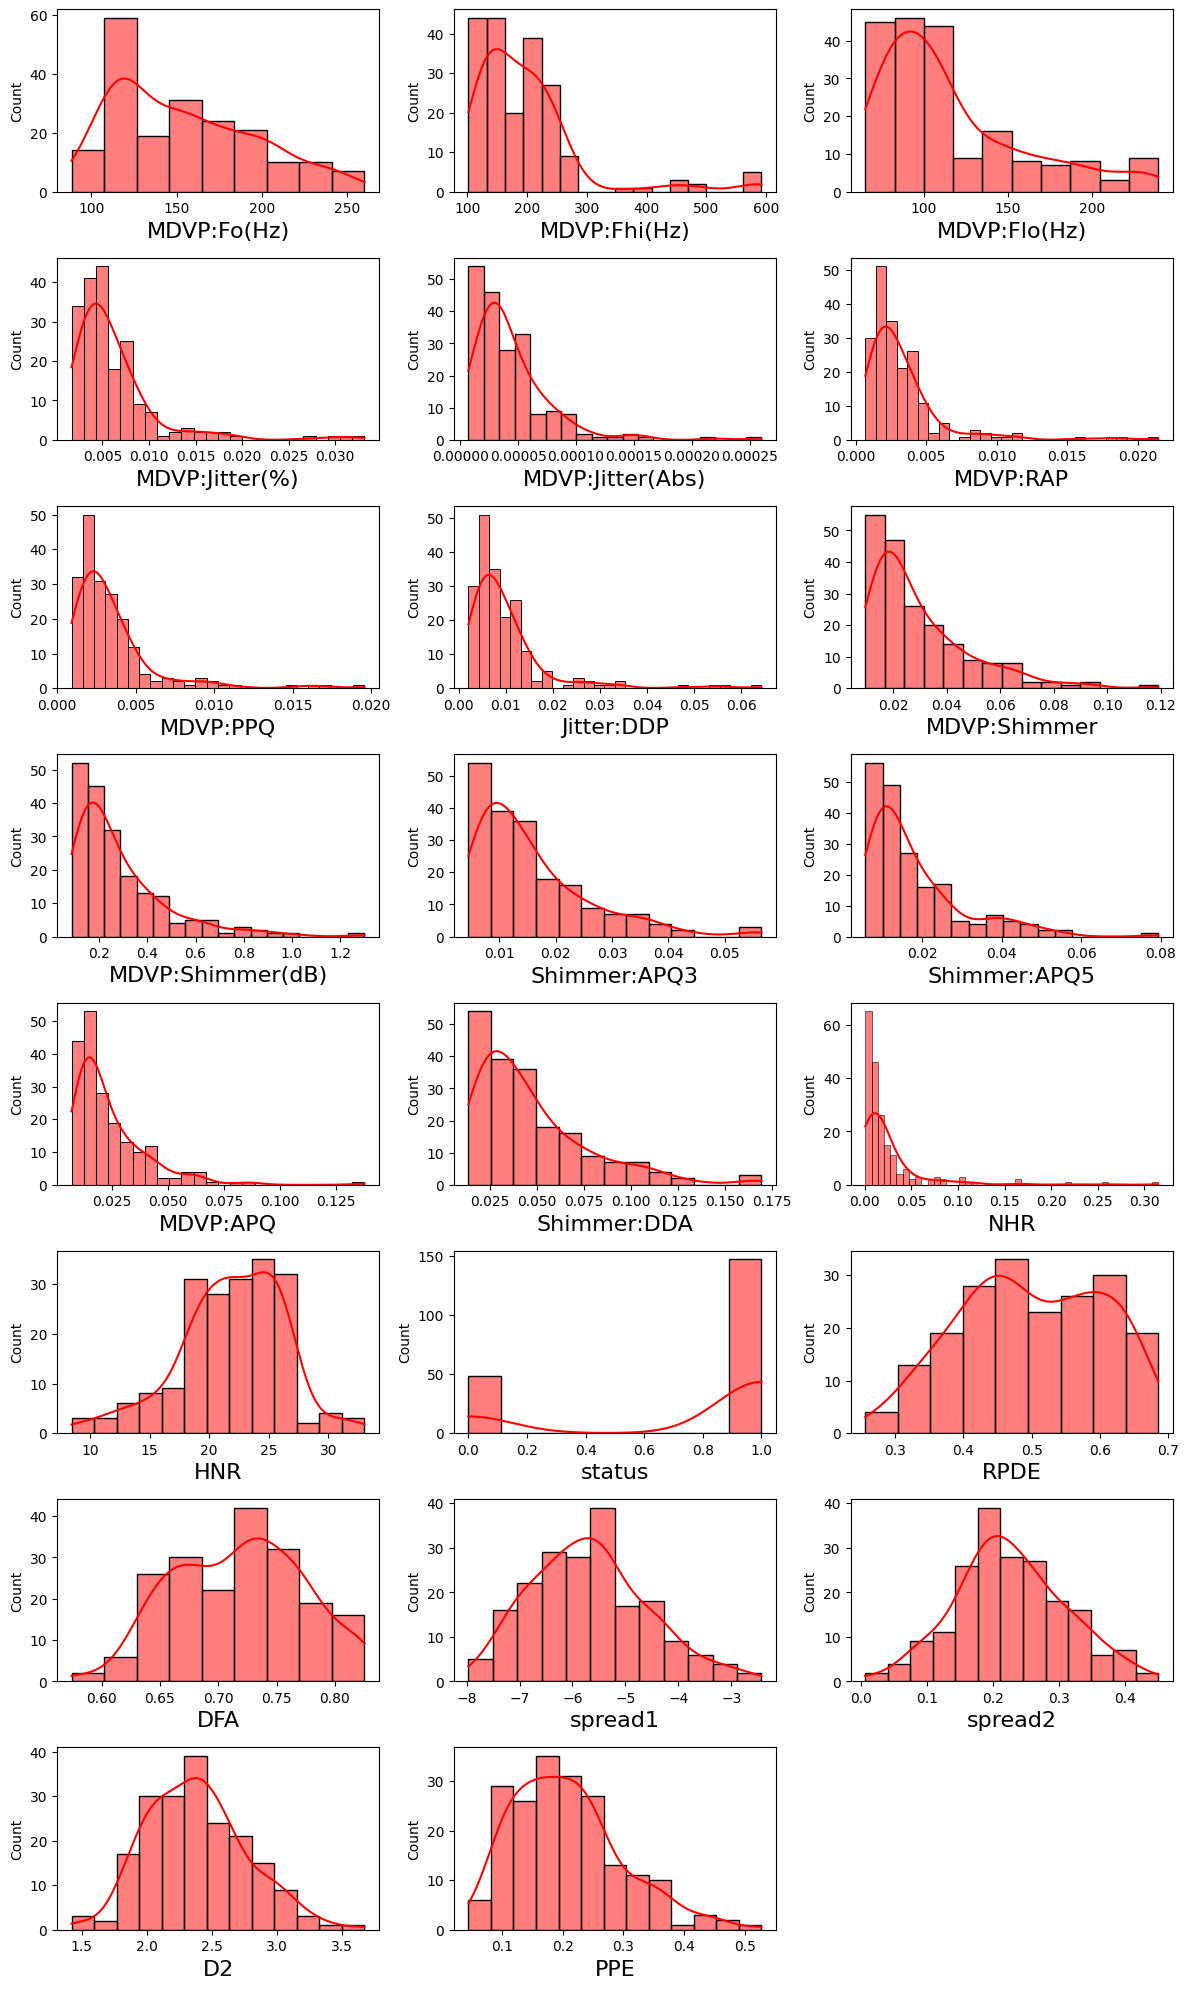

In [ ]:
plot_data(data, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

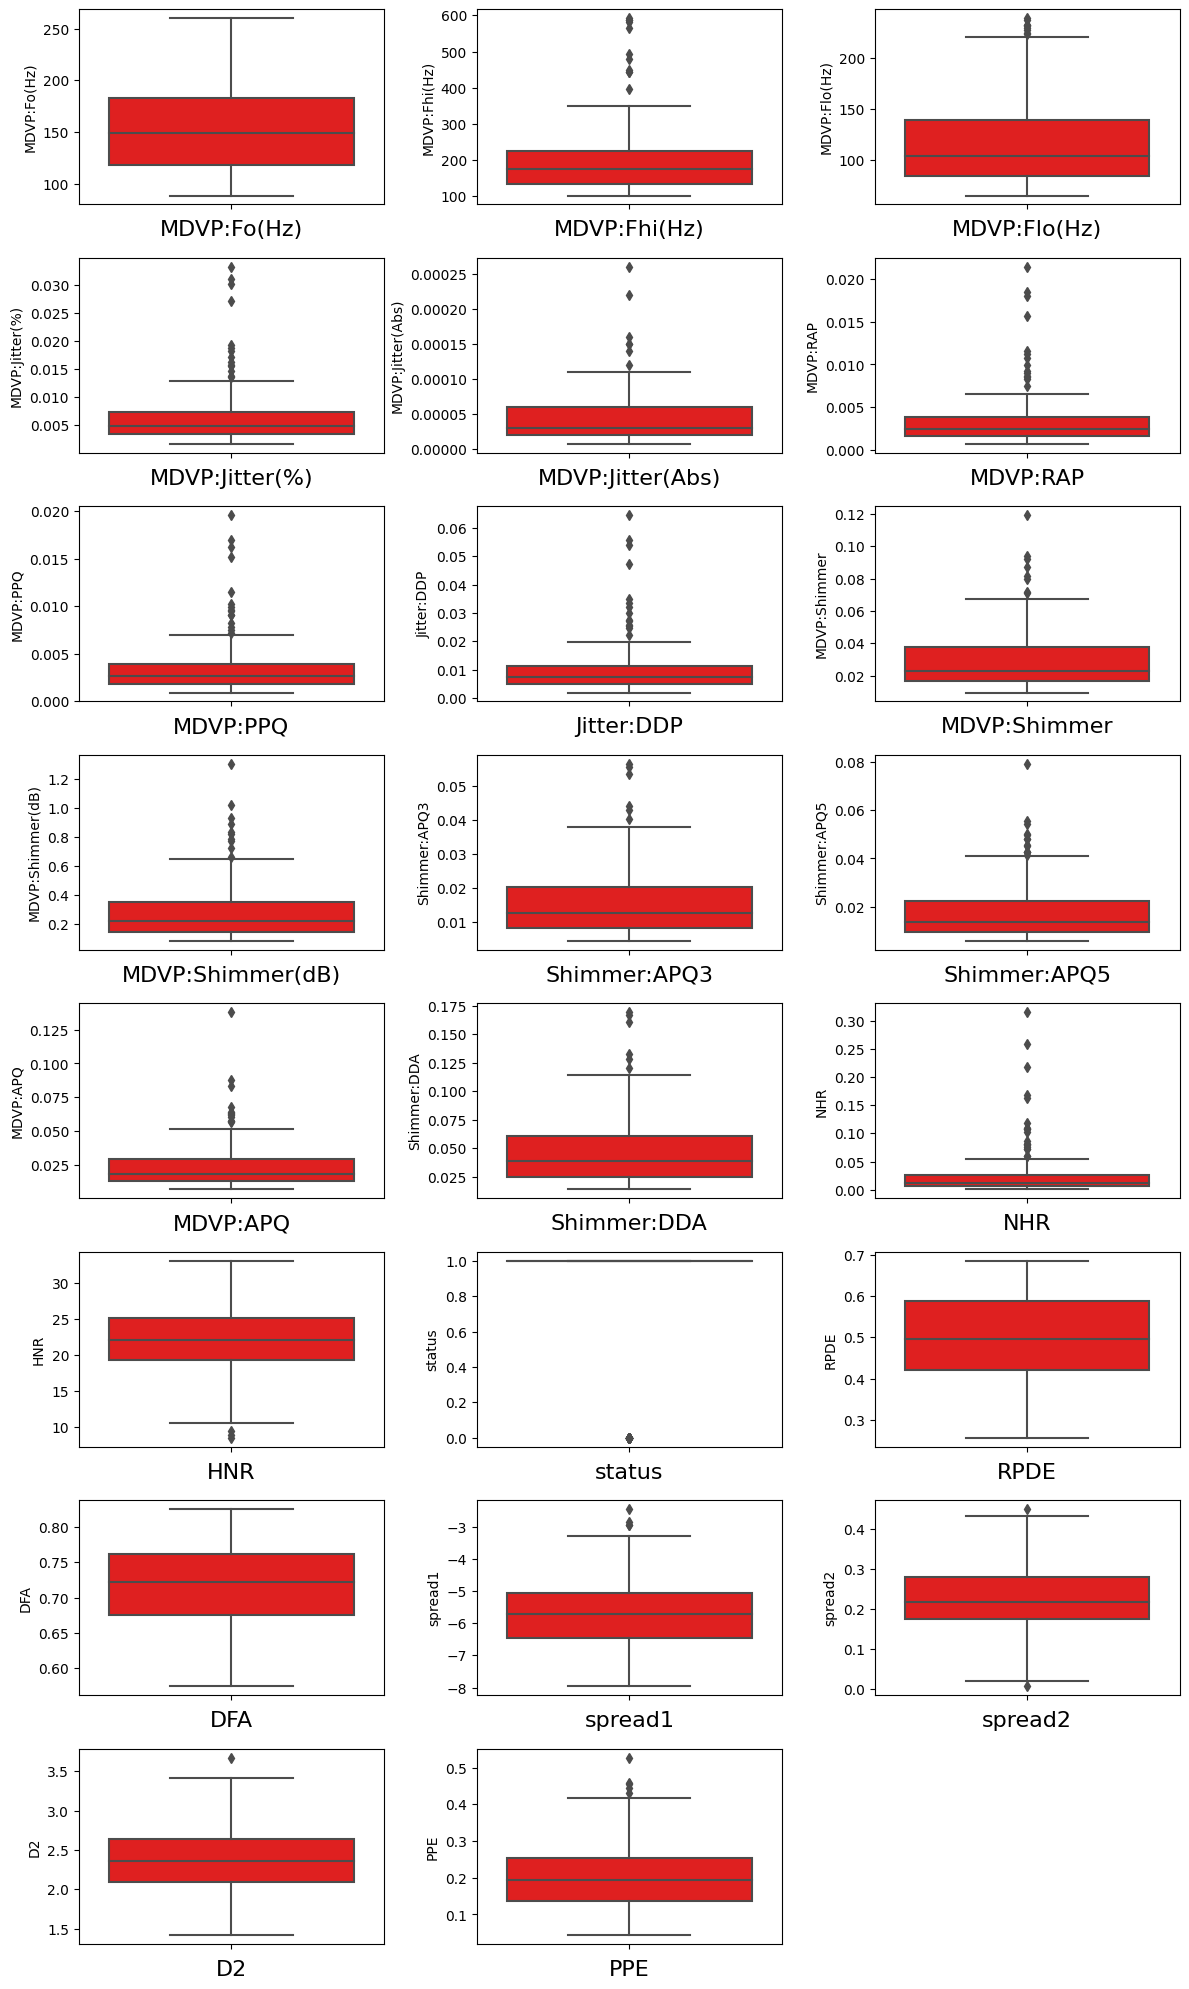

In [ ]:
plot_data(data, plot_type = 'boxplot', grid_size = (8,3), fig_size = (12, 20))

# **DATA PREPROCESSING**

In [8]:
data.rename(columns=({'MDVP:Fo(Hz)':'avg_freq',
                      'MDVP:Fhi(Hz)':'max_freq',
                      'MDVP:Flo(Hz)':'min_freq',
                      'MDVP:Jitter(%)':'var_freq1',
       'MDVP:Jitter(Abs)':'var_freq2', 'MDVP:RAP':'var_freq3', 'MDVP:PPQ':'var_freq4', 'Jitter:DDP':'var_freq5',
       'MDVP:Shimmer':'var_amp1', 'MDVP:Shimmer(dB)':'var_amp2', 'Shimmer:APQ3':'var_amp3', 'Shimmer:APQ5':'var_amp4',
       'MDVP:APQ':'var_amp5', 'Shimmer:DDA':'var_amp6'}),inplace=True)

In [9]:

#re-ordering the columns
col_names = ['avg_freq',
 'max_freq',
 'min_freq',
 'var_freq1',
 'var_freq2',
 'var_freq3',
 'var_freq4',
 'var_freq5',
 'var_amp1',
 'var_amp2',
 'var_amp3',
 'var_amp4',
 'var_amp5',
 'var_amp6',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE',
 'status']
data = data.reindex(columns=col_names)

In [10]:
data.head(5)

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [11]:
corr=data.corr()
cor_target = abs(corr["status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

spread1    0.564838
PPE        0.531039
status     1.000000
Name: status, dtype: float64

In [12]:
data.skew().sort_values(ascending=False)

NHR          4.220709
var_freq5    3.362058
var_freq3    3.360708
var_freq1    3.084946
var_freq4    3.073892
var_freq2    2.649071
var_amp5     2.618047
max_freq     2.542146
var_amp2     1.999389
var_amp4     1.798697
var_amp1     1.666480
var_amp6     1.580618
var_amp3     1.580576
min_freq     1.217350
PPE          0.797491
avg_freq     0.591737
spread1      0.432139
D2           0.430384
spread2      0.144430
DFA         -0.033214
RPDE        -0.143402
HNR         -0.514317
status      -1.187727
dtype: float64

In [15]:
data[['NHR']]=np.sqrt(data[['NHR']])
data[['var_freq5']]=np.sqrt(data[['var_freq5']])
data[['var_freq3']]=np.sqrt(data[['var_freq3']])
data[['var_freq1']]=np.sqrt(data[['var_freq1']])
data[['var_freq4']]=np.sqrt(data[['var_freq4']])
data[['var_freq2']]=np.sqrt(data[['var_freq2']])
data[['var_amp5']]=np.sqrt(data[['var_amp5']])
data[['max_freq']]=np.sqrt(data[['max_freq']])

In [16]:
data.skew().sort_values(ascending=False)

var_amp2     1.999389
var_amp4     1.798697
max_freq     1.793282
var_amp1     1.666480
var_amp6     1.580618
var_amp3     1.580576
var_freq5    1.271085
var_freq3    1.270138
var_freq4    1.250095
min_freq     1.217350
var_freq1    1.205784
var_amp5     0.947939
PPE          0.797491
NHR          0.761793
avg_freq     0.591737
var_freq2    0.465693
spread1      0.432139
D2           0.430384
spread2      0.144430
DFA         -0.033214
RPDE        -0.143402
HNR         -0.514317
status      -1.187727
dtype: float64

## **FINDING THE MEAN,MINIMUM MAXIMUM RANGE OF VALUE FOR EACH ATTRIBUTE**

In [17]:
data.groupby('status').mean()

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp5,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,14.675220,145.207292,0.244595,0.066977,0.205192,0.209709,0.270057,0.017615,0.162958,...,0.337179,0.028511,0.534066,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,13.462677,106.893558,0.279330,0.081273,0.236979,0.240911,0.311894,0.033658,0.321204,...,0.395082,0.053027,0.602541,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [18]:
data.groupby('status').min()

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp5,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,110.739,10.658189,74.287,0.205402,0.051437,0.174159,0.180437,0.229207,0.00954,0.085,...,0.291194,0.01403,0.399590,17.883,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539
1,88.333,10.106681,65.476,0.202454,0.056234,0.161483,0.174159,0.212524,0.01022,0.090,...,0.300093,0.01364,0.468222,8.441,0.263654,0.574282,-7.120925,0.063412,1.765957,0.093193


In [19]:
data.groupby('status').max()

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp5,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,260.105,24.331667,239.17,0.341495,0.094574,0.281058,0.274044,0.369943,0.04087,0.405,...,0.407039,0.07008,0.756396,33.047,0.663842,0.785714,-5.198864,0.291954,2.882450,0.252404
1,223.361,24.259390,199.02,0.426730,0.126982,0.382654,0.374070,0.503620,0.11908,1.302,...,0.609251,0.16942,0.865482,29.928,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#can drop the highly correlated cols

**Train Test Split**

In [20]:
X = data.drop(['status'], axis=1)
y = data['status']

In [21]:
X.shape

(195, 22)

In [ ]:
#X.to_csv("x.csv")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=45)

In [23]:
X_train.shape

(146, 22)

In [ ]:
#y_train.to_csv("ytrain.csv")

**Standarization**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [26]:
X_train

array([[-1.32309787, -1.17114553, -0.45280839, ..., -1.00358821,
         0.0988478 ,  0.6348757 ],
       [-0.07549761, -0.38968889,  0.66395999, ..., -0.57553429,
        -0.3589016 , -0.58220648],
       [ 0.17044892,  2.76322815, -1.06267591, ...,  0.51923312,
         0.64915295, -0.46791551],
       ...,
       [ 0.1188025 ,  0.12653453, -0.85993617, ..., -1.04685046,
        -1.19238761, -0.32934354],
       [-0.81977998, -0.90817545, -0.21728312, ..., -0.15901616,
         0.35636405, -0.46176945],
       [-0.66619708, -0.45047455, -0.40348845, ...,  0.60133374,
         1.30048498,  0.46037205]])

In [ ]:
import numpy as np

# Assuming you have your dataset stored in a NumPy array called 'data'
# You can replace 'data' with your actual dataset name

# Find negative values in the dataset
negative_values = dataset[dataset < 0]

# Print the negative values
print("Negative Values:")
print(negative_values)


Negative Values:
     avg_freq  max_freq  min_freq  var_freq1  var_freq2  var_freq3  var_freq4  \
0         NaN       NaN       NaN        NaN        NaN        NaN        NaN   
1         NaN       NaN       NaN        NaN        NaN        NaN        NaN   
2         NaN       NaN       NaN        NaN        NaN        NaN        NaN   
3         NaN       NaN       NaN        NaN        NaN        NaN        NaN   
4         NaN       NaN       NaN        NaN        NaN        NaN        NaN   
..        ...       ...       ...        ...        ...        ...        ...   
190       NaN       NaN       NaN        NaN        NaN        NaN        NaN   
191       NaN       NaN       NaN        NaN        NaN        NaN        NaN   
192       NaN       NaN       NaN        NaN        NaN        NaN        NaN   
193       NaN       NaN       NaN        NaN        NaN        NaN        NaN   
194       NaN       NaN       NaN        NaN        NaN        NaN        NaN   

     var_f

In [ ]:
import numpy as np

# Assuming you have your dataset stored in a NumPy array called 'data'
# You can replace 'data' with your actual dataset name
# Count the number of negative values in the dataset
negative_count = np.count_nonzero(dataset < 0)

# Print the count of negative values
print("Count of Negative Values:", negative_count)

Count of Negative Values: 0


## **Handling Imbalanced Data**

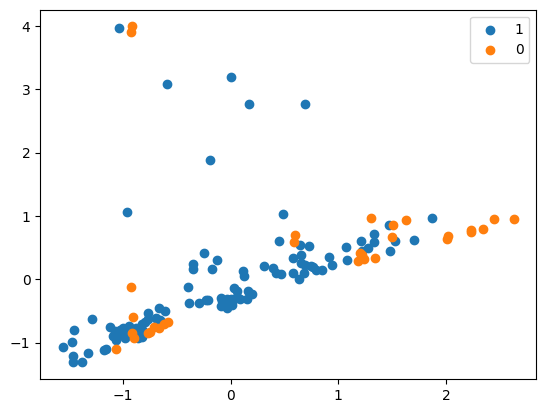

In [37]:
from numpy import where
from matplotlib import pyplot
for label, _ in counter.items():
 row_ix = where(y_train == label)[0]
 pyplot.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

 SMOTE

In [27]:
from imblearn.over_sampling import SMOTE

In [30]:


sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

from collections import Counter
counter=Counter(y_train)
print ('Before' ,counter)
counter = Counter(y_train_res)
print("After", counter)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before Counter({1: 115, 0: 31})
After Counter({1: 115, 0: 115})
After OverSampling, the shape of train_X: (230, 22)
After OverSampling, the shape of train_y: (230,) 



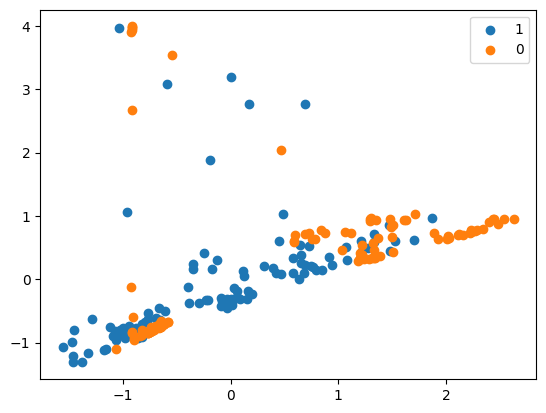

In [39]:
#new_samples_indices = np.where(y_train_res == 0)[0]
#print(len(new_samples_indices))
# Extract the newly generated minority class samples
#X_train_new_samples = X_train_res[new_samples_indices]
#y_train_new_samples = y_train_res[new_samples_indices]
# scatter plot of examples by class label
from numpy import where
from matplotlib import pyplot
for label, _ in counter.items():
 row_ix = where(y_train_res == label)[0]
 pyplot.scatter(X_train_res[row_ix, 0], X_train_res[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [40]:

#plt.scatter(X_train_res[:, 0], X_train_res[:, 1], c=y_train_res, marker='x')
#plt.title('Visualization of SMOTE-generated data')
#plt.legend()
#plt.show()

In [49]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifiers = {
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
}

In [50]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_res, y_train_res)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')

SVC accuracy: 0.9183673469387755
Decision Tree accuracy: 0.8775510204081632
Logistic Regression accuracy: 0.7551020408163265
Naive Bayes accuracy: 0.7346938775510204
KNN accuracy: 0.8979591836734694
Random Forest accuracy: 0.8571428571428571


In [51]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_res, y_train_res)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'{name} classification report:')
    print(report)
    print('-' * 50)

SVC classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.97      0.91      0.94        32

    accuracy                           0.92        49
   macro avg       0.90      0.92      0.91        49
weighted avg       0.92      0.92      0.92        49

--------------------------------------------------
Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.88      0.88      0.88        32

    accuracy                           0.84        49
   macro avg       0.82      0.82      0.82        49
weighted avg       0.84      0.84      0.84        49

--------------------------------------------------
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.86     

**ADASYN**

In [52]:
from imblearn. over_sampling import ADASYN
from collections import Counter
counter=Counter(y_train)
print ('Before' ,counter)
# oversampling the train dataset using ADASYN
ada = ADASYN (random_state=138)
X_train_ada, y_train_ada =ada.fit_resample(X_train, y_train)
counter = Counter(y_train_ada)
print("After", counter)

Before Counter({1: 115, 0: 31})
After Counter({1: 115, 0: 110})


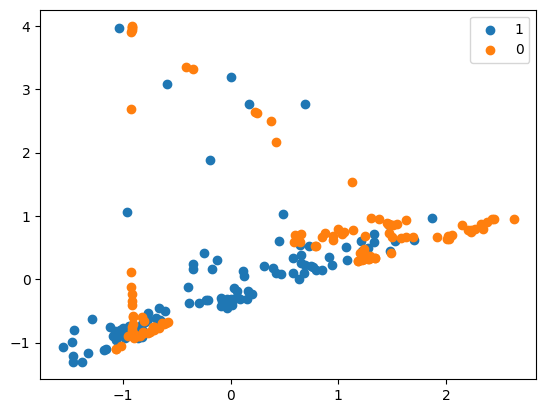

In [46]:
from numpy import where
from matplotlib import pyplot
for label, _ in counter.items():
 row_ix = where(y_train_ada == label)[0]
 pyplot.scatter(X_train_ada[row_ix, 0], X_train_ada[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [53]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_ada, y_train_ada)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')

SVC accuracy: 0.8979591836734694
Decision Tree accuracy: 0.8367346938775511
Logistic Regression accuracy: 0.7346938775510204
Naive Bayes accuracy: 0.7346938775510204
KNN accuracy: 0.9591836734693877
Random Forest accuracy: 0.9387755102040817


In [54]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_ada, y_train_ada)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'{name} classification report:')
    print(report)
    print('-' * 50)

SVC classification report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.97      0.88      0.92        32

    accuracy                           0.90        49
   macro avg       0.88      0.91      0.89        49
weighted avg       0.91      0.90      0.90        49

--------------------------------------------------
Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.83      0.91      0.87        32

    accuracy                           0.82        49
   macro avg       0.81      0.78      0.79        49
weighted avg       0.81      0.82      0.81        49

--------------------------------------------------
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.59      0.76      0.67        17
           1       0.85     

Borderline Smote

In [55]:
import numpy as np
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(random_state=42)
X_train_resam, y_train_resam = smote.fit_resample(X_train, y_train)

In [56]:
counter = Counter(y_train)
print("before", counter)
counter = Counter(y_train_resam)
print("After", counter)

before Counter({1: 115, 0: 31})
After Counter({1: 115, 0: 115})


In [ ]:
X_train.shape


(146, 22)

In [ ]:
X_train_resam.shape

(230, 22)

In [ ]:
y_train.shape

(146,)

In [ ]:
X_test.shape

(49, 22)

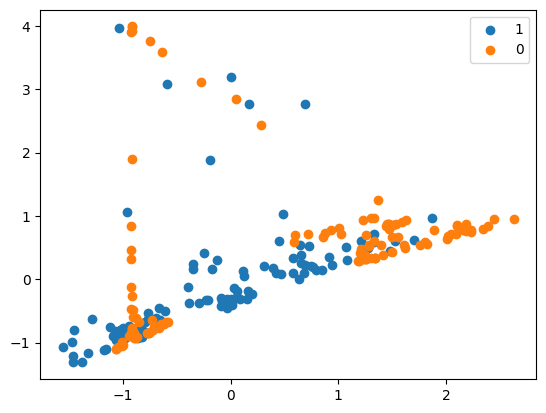

In [57]:
from numpy import where
from matplotlib import pyplot
for label, _ in counter.items():
 row_ix = where(y_train_resam == label)[0]
 pyplot.scatter(X_train_resam[row_ix, 0], X_train_resam[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [59]:
classifiers = {
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
}

In [60]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_resam, y_train_resam)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')


SVC accuracy: 0.8979591836734694
Decision Tree accuracy: 0.8367346938775511
Logistic Regression accuracy: 0.7959183673469388
Naive Bayes accuracy: 0.7346938775510204
KNN accuracy: 0.9387755102040817
Random Forest accuracy: 0.8775510204081632


In [61]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_resam, y_train_resam)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')
    print(f'{name} classification report:')
    print(report)
    print('-' * 50)

SVC accuracy: 0.8979591836734694
SVC classification report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.97      0.88      0.92        32

    accuracy                           0.90        49
   macro avg       0.88      0.91      0.89        49
weighted avg       0.91      0.90      0.90        49

--------------------------------------------------
Decision Tree accuracy: 0.8163265306122449
Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.83      0.91      0.87        32

    accuracy                           0.82        49
   macro avg       0.81      0.78      0.79        49
weighted avg       0.81      0.82      0.81        49

--------------------------------------------------
Logistic Regression accuracy: 0.7959183673469388
Logistic Regression classification report:
            

**KMEANS SMOTE**

In [62]:
from imblearn.over_sampling import KMeansSMOTE
kmeans_smote = KMeansSMOTE(random_state=42)
X_train_kmeans, y_train_kmeans = kmeans_smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
counter = Counter(y_train)
print("before", counter)
counter = Counter(y_train_kmeans)
print("After", counter)

before Counter({1: 115, 0: 31})
After Counter({1: 115, 0: 115})


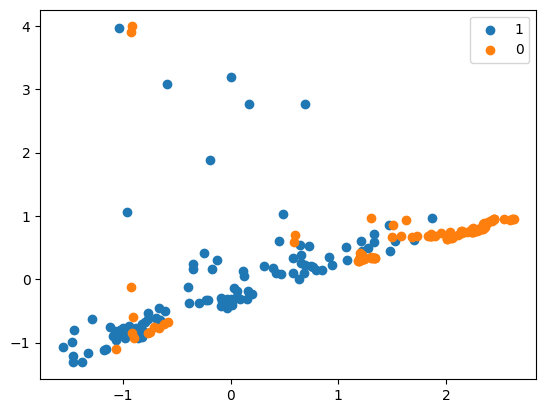

In [64]:
# plt.scatter(X_train_kmeans[:, 0], X_train_kmeans[:, 1], c=y_train_kmeans, marker='x', label='Synthetic Data')
# plt.title('Visualization of kmeans smote-generated data')
# plt.legend()
# plt.show()
from numpy import where
from matplotlib import pyplot
for label, _ in counter.items():
 row_ix = where(y_train_kmeans == label)[0]
 pyplot.scatter(X_train_kmeans[row_ix, 0], X_train_kmeans[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [65]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_kmeans, y_train_kmeans)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')


SVC accuracy: 0.8979591836734694
Decision Tree accuracy: 0.8571428571428571
Logistic Regression accuracy: 0.8367346938775511
Naive Bayes accuracy: 0.7755102040816326
KNN accuracy: 0.9183673469387755
Random Forest accuracy: 0.8775510204081632


In [66]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_kmeans, y_train_kmeans)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')
    print(f'{name} classification report:')
    print(report)
    print('-' * 50)

SVC accuracy: 0.8979591836734694
SVC classification report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.86      1.00      0.93        32

    accuracy                           0.90        49
   macro avg       0.93      0.85      0.88        49
weighted avg       0.91      0.90      0.89        49

--------------------------------------------------
Decision Tree accuracy: 0.8571428571428571
Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.88      0.91      0.89        32

    accuracy                           0.86        49
   macro avg       0.85      0.84      0.84        49
weighted avg       0.86      0.86      0.86        49

--------------------------------------------------
Logistic Regression accuracy: 0.8367346938775511
Logistic Regression classification report:
            

**SVMSMOTE**

In [67]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state=42)
X_train_svm, y_train_svm = svmsmote.fit_resample(X_train, y_train)

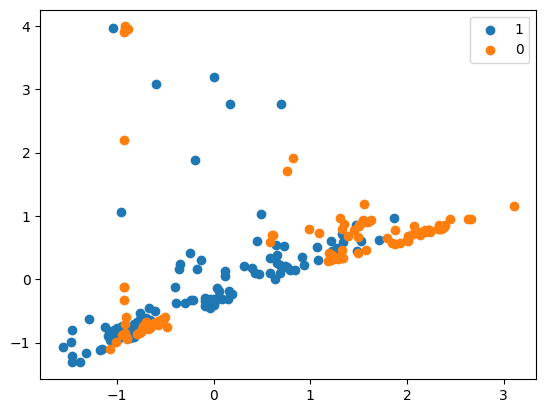

In [68]:

# plt.scatter(X_train_svm[:, 0], X_train_svm[:, 1], c=y_train_svm, marker='x', label='Synthetic Data')
# plt.title('Visualization of SVM SMOTE-generated data')
# plt.legend()
# plt.show()
from numpy import where
from matplotlib import pyplot
for label, _ in counter.items():
 row_ix = where(y_train_svm == label)[0]
 pyplot.scatter(X_train_svm[row_ix, 0], X_train_svm[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [69]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_svm, y_train_svm)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')


SVC accuracy: 0.9183673469387755
Decision Tree accuracy: 0.8163265306122449
Logistic Regression accuracy: 0.7346938775510204
Naive Bayes accuracy: 0.7346938775510204
KNN accuracy: 0.9183673469387755
Random Forest accuracy: 0.8775510204081632


In [70]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_svm, y_train_svm)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')
    print(f'{name} classification report:')
    print(report)
    print('-' * 50)

SVC accuracy: 0.9183673469387755
SVC classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.97      0.91      0.94        32

    accuracy                           0.92        49
   macro avg       0.90      0.92      0.91        49
weighted avg       0.92      0.92      0.92        49

--------------------------------------------------
Decision Tree accuracy: 0.8367346938775511
Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.93      0.81      0.87        32

    accuracy                           0.84        49
   macro avg       0.82      0.85      0.83        49
weighted avg       0.85      0.84      0.84        49

--------------------------------------------------
Logistic Regression accuracy: 0.7346938775510204
Logistic Regression classification report:
            

**Hybridization**: **SMOTE **+ **ENN **

In [71]:
from imblearn.combine import SMOTEENN
counter = Counter(y_train)
print("before", counter)
# oversampling the train dataset using SMOTE
smenn = SMOTEENN()
X_train_smen, y_train_smen =smenn.fit_resample(X_train, y_train)
counter = Counter (y_train_smen)
print('After',counter)

before Counter({1: 115, 0: 31})
After Counter({0: 112, 1: 94})


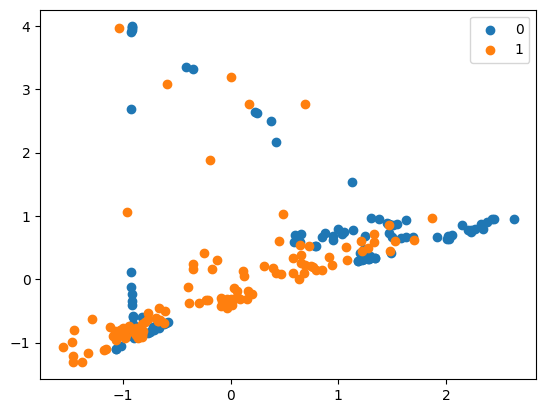

In [72]:
from numpy import where
from matplotlib import pyplot
for label, _ in counter.items():
 row_ix = where(y_train_ada == label)[0]
 pyplot.scatter(X_train_ada[row_ix, 0], X_train_ada[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [73]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_smen, y_train_smen)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')


SVC accuracy: 0.8163265306122449
Decision Tree accuracy: 0.8571428571428571
Logistic Regression accuracy: 0.8163265306122449
Naive Bayes accuracy: 0.7142857142857143
KNN accuracy: 0.9183673469387755
Random Forest accuracy: 0.8571428571428571


In [74]:
for name, classifier in classifiers.items():
    classifier.fit(X_train_smen, y_train_smen)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')
    print(f'{name} classification report:')
    print(report)
    print('-' * 50)

SVC accuracy: 0.8163265306122449
SVC classification report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78        17
           1       0.96      0.75      0.84        32

    accuracy                           0.82        49
   macro avg       0.81      0.85      0.81        49
weighted avg       0.86      0.82      0.82        49

--------------------------------------------------
Decision Tree accuracy: 0.8571428571428571
Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.90      0.88      0.89        32

    accuracy                           0.86        49
   macro avg       0.84      0.85      0.84        49
weighted avg       0.86      0.86      0.86        49

--------------------------------------------------
Logistic Regression accuracy: 0.8163265306122449
Logistic Regression classification report:
            



# **GRIDSEARCH CV FOR KNN**

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

In [76]:
# Create a KNN classifier object
knn = KNeighborsClassifier()
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

*Grid Search CV for KNN (SMOTE):*

In [77]:
# Fit the grid search to the training data
grid_search.fit(X_train_res, y_train_res)
grid_search.cv_results_
acc=grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)



Best Parameters:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Score:  0.9434782608695652
Test Accuracy:  0.9183673469387755


*Grid Search CV for KNN (BORDERLINE SMOTE):*


In [78]:
# Fit the grid search to the training data
grid_search.fit(X_train_resam, y_train_resam)
grid_search.cv_results_

acc=grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)



Best Parameters:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score:  0.9217391304347826
Test Accuracy:  0.8979591836734694


*Grid Search CV for KNN (ADASYN):*


In [79]:
# Fit the grid search to the training data
grid_search.fit(X_train_ada, y_train_ada)
grid_search.cv_results_

acc=grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)


Best Parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score:  0.9333333333333333
Test Accuracy:  0.9591836734693877


*GridSearchCV for KNN (KMEANS SMOTE):*

In [80]:
# Fit the grid search to the training data
grid_search.fit(X_train_kmeans, y_train_kmeans)
grid_search.cv_results_

acc=grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)


Best Parameters:  {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best Score:  0.9086956521739131
Test Accuracy:  0.9183673469387755


*GridSearchCV for KNN (SVM SMOTE):*


In [81]:
# Fit the grid search to the training data
grid_search.fit(X_train_svm, y_train_svm)
grid_search.cv_results_

acc=grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)


Best Parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score:  0.9608695652173914
Test Accuracy:  0.9387755102040817


*GridSearchCV for KNN (SMOTE + TOMEK):*

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train_smtom, y_train_smtom)
grid_search.cv_results_
acc=grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)


Best Parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score:  0.9391304347826088
Test Accuracy:  0.9183673469387755


*GridSearchCV for KNN (SMOTE + ENN):*


In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train_smen, y_train_smen)
grid_search.cv_results_

acc=grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)


Best Parameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score:  0.9904761904761905
Test Accuracy:  0.8775510204081632


# **GridSearchCV for SVM :**

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

*GridSearchCV for SVM (SMOTE)*

In [ ]:
svc = SVC()
# Perform grid search with 5-fold cross-validation

grid_search = GridSearchCV(svc, param_grid_svm, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_res, y_train_res)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score:  0.9565217391304348
Test Accuracy:  0.9387755102040817


*GridSearchCV For SVM(Borderline SMOTE)*

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train_resam, y_train_resam)
grid_search.cv_results_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score:  0.9652173913043478
Test Accuracy:  0.9387755102040817


*GridSearchCV for SVM(ADASYN)*

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train_ada, y_train_ada)
grid_search.cv_results_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score:  0.9606763285024155
Test Accuracy:  0.9591836734693877


*GridSearchCV for SVM(KMEANS SMOTE)*

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train_kmeans, y_train_kmeans)
grid_search.cv_results_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best Score:  0.9130434782608695
Test Accuracy:  0.8367346938775511


*GridSearchCV for SVM(SVM SMOTE)*



In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train_svm, y_train_svm)
grid_search.cv_results_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Score:  0.9608695652173912
Test Accuracy:  0.9387755102040817


*GridSearchCV for SVM(SMOTE + TOMEK)*




In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train_smtom, y_train_smtom)
grid_search.cv_results_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Score:  0.9608695652173914
Test Accuracy:  0.9183673469387755


*GridSearchCV  for SVM(SMOTE + ENN)*

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train_smen, y_train_smen)
grid_search.cv_results_

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", accuracy)

Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score:  0.9807200929152149
Test Accuracy:  0.8775510204081632
